In [1]:
print("Project 1")

Project 1


In [41]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import *
import matplotlib.pyplot as plt

In [22]:
def calculate_metrics(y_true, y_pred):
    tp = tn = fp = fn = 0
    for t, p in zip(y_true, y_pred):
        if t == 1 and p == 1: tp += 1
        elif t == 0 and p == 0: tn += 1
        elif t == 0 and p == 1: fp += 1
        else: fn += 1
    return tp, tn, fp, fn

    



In [23]:
X, y = load_iris(return_X_y=True)
X = X[y != 2]
y = y[y != 2]

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=42)

In [26]:
model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
y_proba = model.predict_proba(X_test)[:,1]

In [38]:
tp,tn,fp,fn = calculate_metrics(y_test, y_pred)
total = tp+tn+fp+fn
print("Custom Calculation:")
print(f"Accuracy:{(tp+tn)/total:.4f}")
print(f"Precision: {tp/(tp+fp):.4f}")
print(f"Recall: {tp/(tp+fn):.4f}")
print(f"F1-Score: {(2*tp)/(2*tp+fp+fn):.4f}")
print(f"MCC: {(tp*tn-fp*fn)/np.sqrt((tp+fp)*(tp+fn)*(tn+fp)*(tn+fn)):.4f}")
print(f"Specificity: {tn/(tn+fp):.4f}")
print(f"NPV: {tn/(tn+fn):.4f}\n")



Custom Calculation:
Accuracy:1.0000
Precision: 1.0000
Recall: 1.0000
F1-Score: 1.0000
MCC: 1.0000
Specificity: 1.0000
NPV: 1.0000



In [ ]:
print("Sklearn metrics:")
print(f"accuracy_score: {accuracy_score(y_test, y_pred):.4f}")
print(f"Precision: {precision_score(y_test, y_pred):.4f}")
print(f"Recall: {recall_score(y_test, y_pred):.4f}")
print(f"F1-Score: {f1_score(y_test, y_pred):.4f}")
print(f"MCC: {matthews_corrcoef(y_test, y_pred):.4f}")


Sklearn metrics:
accuracy_score: 1.0000
Precision: 1.0000
Recall: 1.0000
F1-Score: 1.0000
MCC: 1.0000


Confusion Matrix:


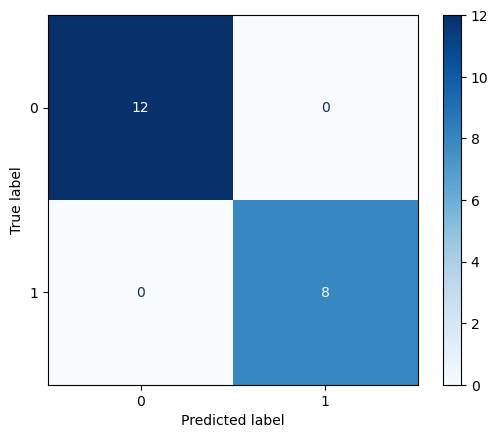

[1 1 1 0 0 0 0 1 0 0 0 0 1 0 1 0 1 1 0 0]
[0.99881545 0.98420197 0.99695291 0.03040059 0.05730628 0.02838856
 0.00643678 0.9683098  0.02539298 0.0210692  0.04487116 0.03927331
 0.99569257 0.01413626 0.99072208 0.01853577 0.99792052 0.99874469
 0.02538436 0.03883831]


In [42]:
print("Confusion Matrix:")
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap="Blues")
plt.show()
print(y_test)
print(y_proba)

In [43]:
print(total)

20
